<a href="https://colab.research.google.com/github/Joycechidi/Secure-and-Private-AI/blob/master/fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build and train a neural network to classify clothing images

In [0]:
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py

--2019-06-10 03:46:56--  https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py [following]
--2019-06-10 03:46:56--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-06-10 03:46:56 (42.5 MB/s) - ‘helper.py’ saved [2813

In [0]:
import torch

from torch import optim
from torchvision import datasets, transforms
import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,), (0.5,)),
                               ])

# #Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


#Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Let's seee one of the images

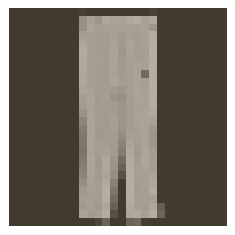

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. 

Use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. 
Choose how many layers you add and the size of those layers.

# Building the Network

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
#Define my network architecture

from torch import nn, optim
import torch.nn.functional as F

In [0]:
#Define the network architecture
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Defining the layers, 128, 64, 10 units each
#     n_input = 784
#     n_hidden = 256
#     n_hidden1 = 128
#     n_hidden2 = 64
#     n_output = 10    #softmax
    
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128, 64)
    
    #Output layer, 10 units - one for each digit
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    '''Forward pass through the network, returns the output logits.
    Flatten the input tensors
    '''
    
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
   
    x = F.log_softmax(self.fc4(x), dim=1)
    
    
    return x
  
model = Classifier()
model
              

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

Initializing weights and biases

In [0]:
print(model.fc4.weight)
print(model.fc4.bias)

Parameter containing:
tensor([[ 3.9299e-02,  2.1975e-02,  3.1323e-02,  5.1178e-02,  8.6593e-02,
         -4.7515e-02,  7.4601e-02, -1.9377e-02,  1.1726e-01, -1.0256e-01,
         -4.5163e-02, -4.8916e-02, -1.1571e-01, -1.1377e-01, -6.5923e-02,
         -1.1254e-01,  7.2630e-02, -1.0322e-01, -2.8581e-02, -4.0978e-02,
          1.4905e-02, -1.6588e-02, -6.8803e-02, -3.0760e-02, -2.5150e-02,
         -2.6219e-02,  1.2259e-01,  2.0309e-02, -5.2899e-02, -1.2722e-02,
          1.5282e-02, -3.9968e-02,  7.0522e-02,  7.8290e-02, -6.5559e-02,
          3.6777e-02,  8.7550e-02, -5.2479e-02, -1.0056e-01,  9.1113e-02,
          1.1940e-03,  1.7466e-02, -1.0527e-01, -1.1141e-01,  3.3273e-02,
          1.1027e-01, -1.2052e-01,  3.6612e-02,  9.1720e-02,  5.9893e-03,
         -1.2139e-01, -7.5606e-02, -1.1094e-01, -1.8750e-02,  1.2291e-02,
         -1.0847e-01, -2.0968e-02, -7.6567e-02, -3.0854e-02, -5.6046e-02,
         -2.3657e-02, -3.4938e-02, -1.2700e-02, -4.4245e-02],
        [ 4.4975e-02, -8.919

Modify the tensors in place

In [0]:
#Set bias to all zeros
#model.fc4.bias.data.fill_(0)

In [0]:
#sample from random normal with standard dev = 0.01
#model.fc4.weight.data.normal_(std=0.01)

# Forward Pass

We now have an image, let's see what happens when we pass in an image

In [0]:
# # Grab some data 
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# # Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
# images.resize_(64, 1, 784)
# # or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# # Forward pass through the network
# img_idx = 0
# ps = model.forward(images[img_idx,:])

# img = images[img_idx]

# Optimize before training the network

Before training the model, we need to take a few more steps Use an optimizer to update the weight with the gradients. We get the optimizers from the optim package. E.g use stochastic gradient descent with optim.SGD

# Training the Network

In [0]:
#Define the criterion and optimizer

model = Classifier()

#Define the loss
criterion = nn.NLLLoss()  #NLLLoss means Negative Log Likelihood Loss

#Optimize the parameters
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [0]:
#Train the network
epochs = 15

for e in range(epochs):
  running_loss = 0
  
  for images, labels in trainloader:
    #Flaten MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
        
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    #TO DO: Training pass
    optimizer.zero_grad()   
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.30072298344931625
Training loss: 0.287890888409002
Training loss: 0.28126887792050204
Training loss: 0.2722526311572554
Training loss: 0.26826959473094836
Training loss: 0.2564487632062199
Training loss: 0.25046094738518887
Training loss: 0.246054194557832
Training loss: 0.23963885653470116
Training loss: 0.23271123229313506
Training loss: 0.22817794708952086
Training loss: 0.22660849125448193
Training loss: 0.222489221982642
Training loss: 0.21650624146927266
Training loss: 0.21256234154883605


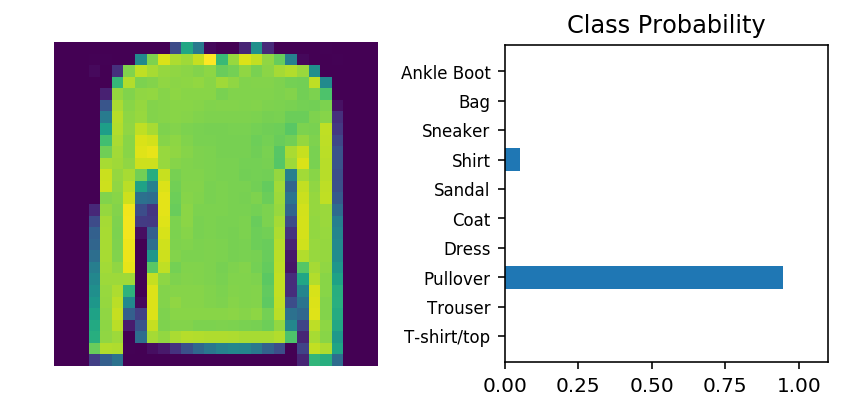

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')